<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import gc
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()
import torch
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchmetrics import AUROC,F1Score
from torchmetrics.classification import BinaryF1Score
from torchsummary import summary as torchsummary

In [ ]:
%%capture
!pip install torchmetrics

In [ ]:
%%capture
!pip install torchsummary

In [ ]:
import torch.nn.functional as F

# F.binary_cross_entropy(out, labels)   # Calculate loss
s =  F.binary_cross_entropy( torch.tensor([0.,1,0.5]), torch.tensor([0,1.,1] ) )  # Important to have float - on [0,1] it crashes - "Long not supported"
print( s )
print( s.grad_fn )

import torch.nn as nn
preds = torch.tensor([0.,1,0.5])
target = torch.tensor([0,1.,1])
loss_func = nn.BCELoss()
s = loss_func(preds, target )
print( s )
print( s.grad_fn )

import torch.nn as nn
preds = torch.tensor([0.,1,0.5])
target = torch.tensor([0,1.,1])
loss_func  = torch.nn.MSELoss()
s = loss_func(preds, target )
print( s )
print( s.grad_fn )


from torchmetrics import AUROC,F1Score

auroc = AUROC(task = 'binary')
# order of arguments is different from the sklearn : sklearn - y_true, y_score, while in pytorch - y_score, y_true
# Also we first need to initialize  aucroc = AUROC(task = 'binary'), and only then apply
s = auroc(torch.tensor([0,.6,0]), torch.tensor([0,1,1]) )
print('\n AUC')
print( s )
print( s.grad_fn )
s = auroc(torch.tensor([0,.01,0.02,0]), torch.tensor([0,1,1,1]) )
print( s )
s = auroc(torch.tensor([0,.1,0.2,0]), torch.tensor([0,1,1,1]) )
print( s )
print()

target = torch.tensor([0, 1, 1, 0, 1, 1])
preds = torch.tensor([0, 1, 1, 0, 0, 1])
f1 = F1Score(task="multiclass", num_classes=2)
s = f1(preds, target)
print( s )
print( s.grad_fn )

from torchmetrics.classification import BinaryF1Score
f1 = BinaryF1Score(threshold=0.5, multidim_average= 'global'  )
s = f1(preds, target)
print( s )
print( s.grad_fn )

tensor(0.2310)
None
tensor(0.2310)
None
tensor(0.0833)
None

 AUC
tensor(0.7500)
None
tensor(0.8333)
tensor(0.8333)

tensor(0.8333)
None
tensor(0.8571)
None


In [ ]:
target =  torch.tensor( (np.random.randn(100,10)>0).astype(float) )
preds = torch.tensor( np.clip( np.random.randn(100,10) + 0.5, 0 ,1) )
target.shape

torch.Size([100, 10])

In [ ]:
preds.shape

torch.Size([100, 10])

In [ ]:
target.numpy().ravel().shape

(1000,)

In [ ]:
preds.numpy().ravel() >= 0.5

array([False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False,  True,  True, False,  True, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,

In [ ]:


#  multidim_average= 'global'
print( " multidim_average= 'global'   ", 'Scalar will be returned')
f1 = BinaryF1Score(threshold=0.5, multidim_average= 'global'  )
s = f1(preds, target)
print(s.shape)
print( s )

print( s.grad_fn )

print()
print(" multidim_average= 'samplewise'  ", 'vector of values for each sample will be returned')
f1 = BinaryF1Score(threshold=0.5, multidim_average= 'samplewise'  )
s = f1(preds, target)
print(s.shape)
print(s.mean() )
print( s )
print( s.grad_fn )

print()
print()
print('Implement the same with sklearn')
from sklearn.metrics import f1_score
print('Global case ')
s = f1_score( target.numpy().ravel() ,   preds.numpy().ravel() >= 0.5  )
print(np.round(s,4))

print('Samplewise case:')
l = [ f1_score( target.numpy()[i,:], preds.numpy()[i,:] >= 0.5 ) for i in range(preds.shape[0]) ]
s = np.mean(l)
print( np.round(s,4))

 multidim_average= 'global'    Scalar will be returned
torch.Size([])
tensor(0.5381)
None

 multidim_average= 'samplewise'   vector of values for each sample will be returned
torch.Size([100])
tensor(0.5145)
tensor([0.5000, 0.7273, 0.3333, 0.4444, 0.3636, 0.7692, 0.2857, 0.6667, 0.8889,
        0.0000, 0.6000, 0.7143, 0.2857, 0.3636, 0.6154, 0.5000, 0.5714, 0.7692,
        0.4000, 0.6154, 0.5000, 0.6154, 0.6667, 0.6154, 0.7692, 0.2000, 0.4444,
        0.3636, 0.3333, 0.1818, 0.4444, 0.8889, 0.5000, 0.4615, 0.2500, 0.6000,
        0.6667, 0.5455, 0.4615, 0.3636, 0.2222, 0.8235, 0.4444, 0.5000, 0.5455,
        0.3636, 0.8333, 0.7273, 0.8000, 0.6667, 0.2500, 0.6154, 0.2857, 0.4615,
        0.8000, 0.6154, 0.4000, 0.2222, 0.6667, 0.6667, 0.6667, 0.2500, 0.7273,
        0.6000, 0.1818, 0.2222, 0.4444, 0.2500, 0.8000, 0.6667, 0.2857, 0.2500,
        0.3636, 0.2857, 0.5000, 0.4444, 0.6000, 0.5455, 0.5714, 0.6000, 0.5000,
        0.7143, 0.7143, 0.5000, 0.2500, 0.8333, 0.4000, 0.2857, 0.6667, 

In [ ]:
%%time
s = auroc(preds, target )
print( s )


from sklearn.metrics import roc_auc_score
s = roc_auc_score(target.numpy().ravel() , preds.numpy().ravel())
print( np.round(s,4) )

tensor(0.5303)
0.5303
CPU times: user 6.64 ms, sys: 2.86 ms, total: 9.5 ms
Wall time: 29 ms


In [ ]:
target.numpy().ravel() , preds.numpy().ravel()

(array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
        1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
        0., 

do NOT do like that - canNOT apply metrics to list/np.arrays etc - we can apply metrics to pytorch tensors only¶


In [ ]:
try:
    F.binary_cross_entropy( np.array([0.,1.,0.5]), np.array([0.,1.,1.] ) )
    F.binary_cross_entropy( [0.,1.,0.5] ,  [0.,1.,1.]  )
    aucroc(([0,.6,0]), ([0,1,1]) )
    aucroc(np.array([0,.6,0]), np.array([0,1,1]) )
except Exception as inst:
    print(type(inst))    # the exception type
    print(inst.args)     # arguments stored in .args
    print(inst)

<class 'TypeError'>
("'int' object is not callable",)
'int' object is not callable


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle kernels pull alexandervc/pytorch-01-basics

Source code downloaded to /content/pytorch-01-basics.ipynb


In [ ]:
!kaggle competitions download -c pytorch-01-basics

403 - Forbidden - Permission 'competitions.participate' was denied


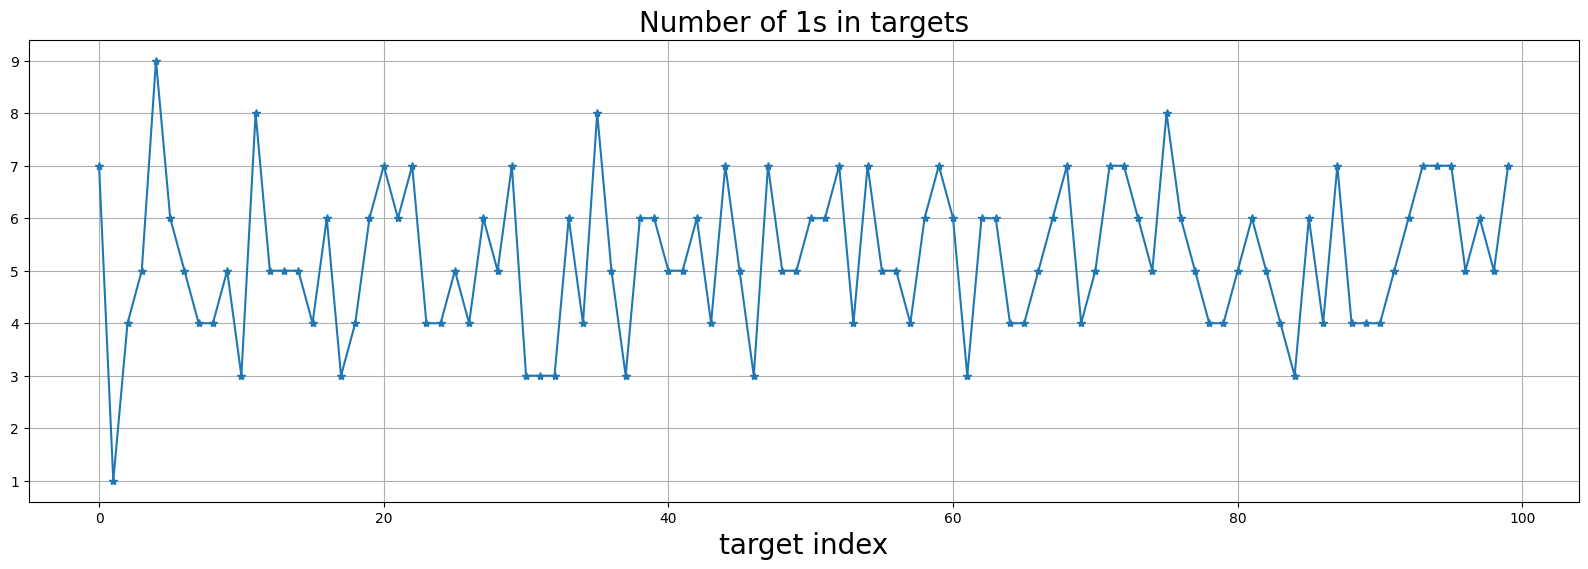

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assuming you have a tensor Y (you may need to replace this with your actual data)
Y = torch.tensor( (np.random.randn(100,10)>0).astype(float) )
# Check if Y is 0-dimensional (a scalar) or a 1D/2D tensor
if len(Y.shape) == 0:
    raise ValueError("Y is empty or not properly structured.")

# If Y is a scalar, consider it as a single-element 1D tensor
if len(Y.shape) == 0:
    Y = torch.tensor([Y])

# Count the number of 1s in each column (assuming it's a 2D tensor)
v = Y.sum(axis=1)

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(v, '*-')
plt.grid()
plt.title('Number of 1s in targets', fontsize=20)
plt.xlabel('target index', fontsize=20)
plt.show()


In [ ]:
import torch.nn as nn
# https://www.kaggle.com/code/alexandervc/moa-nn-04/notebook

class MyModel(nn.Module): # The parent class for the models is nn.Module

    def __init__(self, in_features, out_features): # constructor

        super().__init__() # the constructor of the upper class is first called

        self.in_features = in_features
        self.out_features = out_features

        self.model = nn.Sequential( #  Sequential addition of layers -  multi-layer perceptron
            nn.BatchNorm1d(in_features),
            nn.Linear(in_features, 800),
            nn.ReLU(),

            nn.BatchNorm1d(800),            # nn.Dropout(0.1),
            nn.Linear(800, 600),
            nn.ReLU(),

            nn.BatchNorm1d(600),            # nn.Dropout(0.1),
            nn.Linear(600, 400),
            nn.ReLU(),

            nn.BatchNorm1d(400),
            nn.Linear(400, out_features),
            nn.Sigmoid()
        )

    def forward(self, x): #
        return self.model(x)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
# Define the dimensions for X and Y
input_dim = 100 # Example input dimension
output_dim = 5  # Example output dimension

# Create random values for X and Y
num_samples = 1000  # Number of data samples

# Generate random input data X
X = torch.randn(num_samples, input_dim).to(device)

# Generate random target data Y
Y = torch.randint(0, 2, (num_samples, output_dim)).float().to(device)

In [ ]:
model = MyModel(X.shape[1],Y.shape[1])
model.to(device)

MyModel(
  (model): Sequential(
    (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=100, out_features=800, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=800, out_features=600, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(600, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=600, out_features=400, bias=True)
    (8): ReLU()
    (9): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Linear(in_features=400, out_features=5, bias=True)
    (11): Sigmoid()
  )
)

In [ ]:
# That does not work for us - why ?
try:
    torchsummary(model, XX.size(), batch_size=-1, device= 'cuda')
except    Exception as inst:
    print(type(inst))    # the exception type
    print(inst.args)     # arguments stored in .args
    print(inst)          # __str__ allows args to be printed directly,
                         # but may be overridden in exception subclasses

<class 'NameError'>
("name 'XX' is not defined",)
name 'XX' is not defined


In [ ]:
import torch

# Assuming you have a PyTorch model defined as "model"

# Generate random input data X with 1000 channels
input_channels = 1000
num_samples = 100  # Number of data samples
input_size = (num_samples, input_channels)
X = torch.randn(*input_size).to(device)

# Generate random target data Y
output_dim = 5  # Example output dimension
Y = torch.randint(0, 2, (num_samples, output_dim)).float().to(device)
model = MyModel(X.shape[1],Y.shape[1])

# Set the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = str(device)
model.to(device)

# Generate the model summary
from torchsummary import summary
summary(model, input_size=input_size[1:], device=device)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                 [-1, 1000]           2,000
            Linear-2                  [-1, 800]         800,800
              ReLU-3                  [-1, 800]               0
       BatchNorm1d-4                  [-1, 800]           1,600
            Linear-5                  [-1, 600]         480,600
              ReLU-6                  [-1, 600]               0
       BatchNorm1d-7                  [-1, 600]           1,200
            Linear-8                  [-1, 400]         240,400
              ReLU-9                  [-1, 400]               0
      BatchNorm1d-10                  [-1, 400]             800
           Linear-11                    [-1, 5]           2,005
          Sigmoid-12                    [-1, 5]               0
Total params: 1,529,405
Trainable params: 1,529,405
Non-trainable params: 0
---------------------------

In [ ]:
X.size()

torch.Size([100, 1000])

In [ ]:
%%time
from sklearn.model_selection import train_test_split

IX_train,IX_val = train_test_split( np.arange(len(X)), train_size=0.7, random_state=42)
print(IX_train.shape,IX_val.shape)

(70,) (30,)
CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 1.3 ms


In [ ]:
X.shape

torch.Size([100, 1000])

In [ ]:
%%time
X_train = torch.tensor(X[IX_train,:], dtype=torch.float32).to(device)
Y_train = torch.tensor(Y[IX_train,:], dtype=torch.float32).to(device)

X_val = torch.tensor(X[IX_val,:], dtype=torch.float32).to(device)
Y_val = torch.tensor(Y[IX_val,:], dtype=torch.float32).to(device)

print(X_train.shape, Y_train.shape,X_val.shape, Y_val.shape )

torch.Size([70, 1000]) torch.Size([70, 5]) torch.Size([30, 1000]) torch.Size([30, 5])
CPU times: user 1.51 ms, sys: 2.21 ms, total: 3.71 ms
Wall time: 9.59 ms


In [ ]:
%%time
BATCH_SIZE = 256

from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# val_dataset = TensorDataset(X_val, Y_val)
# val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

CPU times: user 551 µs, sys: 0 ns, total: 551 µs
Wall time: 1.74 ms


In [ ]:
import datetime
current_datetime = datetime.datetime.now()

print("Current datetime:", current_datetime)

Current datetime: 2023-10-15 18:34:22.969645


In [ ]:
%%time

max_epoch = 15


import time
t0 = time.time()

from torchmetrics.classification import BinaryF1Score
f1 = BinaryF1Score(threshold=0.25, multidim_average= 'samplewise'  )
from torchmetrics import AUROC
auroc = AUROC(task = 'binary')


print('X.shape, Y.shape', X.shape, Y.shape )
print()

# do not fortget to reinitialize model when you debug the notebook, since otherwise - each time you rerun the current cell
# - you will update existing weights  - it would be easy to see that starting loss is unexpectdely small
model = MyModel(X.shape[1],Y.shape[1])
model.to(device)



optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) #SGD(model.parameters(), lr=1e-3)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 0.05, 10)
criterion = nn.BCELoss()


df_stat = pd.DataFrame(); IX_stat = -1;
print()
print( str(model))
print()
current_datetime = datetime.datetime.now()
print('Start training NN',current_datetime)
print()
for epoch in range(max_epoch):
    t0_epoch = time.time()
    model.train() # switch model into train mode i.e. allow gradients computation - opposite of model.eval() - no grad computation
    for i_batch, (x_batch, y_batch) in enumerate(train_dataloader): # Loop ove batches
#             x_batch, y_batch = x_batch.to(device), y_batch.to(device) # do we need it ? may be already on device
        preds = model(x_batch)# Compute predictions only for batch samples

        optimizer.zero_grad() # technical - set gradients to zero, otherwise they will be accumulated

        loss = criterion(preds, y_batch) # Compute loss function
        loss.backward() # Compute gradients
        optimizer.step() # Update NN weights using gradients

        if i_batch % 100 == 0:
            print(f'Epoch: {epoch}, batch: {i_batch},  train loss on batch: {loss.item():12.5f} , time: {time.time() - t0:.1f} ' )

    t0_epoch_train = time.time() - t0_epoch
    model.eval()
    with torch.no_grad():
        train, y_train = train_dataset.tensors
        # train, y_train = train.to(device), y_train.to(device) # They already should on device, why we need that ?
        preds = model(train)
        preds_train = preds
        loss = criterion(preds, y_train)
        loss1 = loss.item()
        print()
        print(f'Epoch: {epoch} finished,  train loss: {loss.item():12.5f} , time: {time.time() - t0:.1f} seconds ' )

        preds = model(X_val)
        preds_val = preds
        loss = criterion(preds, Y_val)
        loss2 = loss.item()
        print(f'Epoch: {epoch} finished,  VALidation loss: {loss.item():12.5f} , time: {time.time() - t0:.1f} seconds ' )
        print()

        IX_stat += 1
        df_stat.loc[IX_stat, 'epoch'] = epoch
        df_stat.loc[IX_stat, 'BCE Val'] = loss2
        df_stat.loc[IX_stat, 'BCE Train'] = loss1

        #from torchmetrics.classification import BinaryF1Score
        f1 = BinaryF1Score(threshold=0.25, multidim_average= 'samplewise'  )
        s = f1(preds_val, Y_val) # vector of values for each sample
        df_stat.loc[IX_stat, 'F1|0.25 Val'] = s.mean().item()#  average over samples
        s = f1(preds_train, y_train)
        df_stat.loc[IX_stat, 'F1|0.25 Train'] =  s.mean().item()

        #from torchmetrics import AUROC
        auroc = AUROC(task = 'binary')
        s = auroc(preds_val, Y_val) # auroc between flattened arguments
        df_stat.loc[IX_stat, 'AUC Val'] = s.item()#  average over samples
        s = auroc(preds_train, y_train) # auroc between flattened arguments
        df_stat.loc[IX_stat, 'AUC Train'] =  s.item()


        for threshold_for_f1 in [0.2,0.3]:
            #from torchmetrics.classification import BinaryF1Score
            f1 = BinaryF1Score(threshold=threshold_for_f1, multidim_average= 'samplewise'  )
            s = f1(preds_val, Y_val) # vector of values for each sample
            df_stat.loc[IX_stat, 'F1|'+str(threshold_for_f1)+' Val'] = s.mean().item()#  average over samples
            s = f1(preds_train, y_train)
            df_stat.loc[IX_stat, 'F1|'+str(threshold_for_f1)+' Train'] =  s.mean().item()


        df_stat.loc[IX_stat, 'Time epoch train'] = np.round(t0_epoch_train , 1 )
        df_stat.loc[IX_stat, 'Time epoch full'] = np.round(time.time() - t0_epoch , 1 )
        display(df_stat.tail(2))



print('Training finished', '%.1f seconds passed'%(time.time() - t0 ))
df_stat = df_stat.round(4)
display(df_stat)

X.shape, Y.shape torch.Size([100, 1000]) torch.Size([100, 5])


MyModel(
  (model): Sequential(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=1000, out_features=800, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=800, out_features=600, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(600, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=600, out_features=400, bias=True)
    (8): ReLU()
    (9): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Linear(in_features=400, out_features=5, bias=True)
    (11): Sigmoid()
  )
)

Start training NN 2023-10-15 19:07:04.987182

Epoch: 0, batch: 0,  train loss on batch:      0.73112 , time: 0.1 

Epoch: 0 finished,  train loss:      0.65279 , time: 0.1 seconds 
Epoch: 0 finished,  VALidation loss:   

,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
0,0.0,0.692998,0.652791,0.654365,0.598526,0.54466,0.999803,0.654365,0.598526,0.654365,0.598526,0.0,0.1


Epoch: 1, batch: 0,  train loss on batch:      0.17904 , time: 0.1 

Epoch: 1 finished,  train loss:      0.61413 , time: 0.1 seconds 
Epoch: 1 finished,  VALidation loss:      0.69489 , time: 0.1 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
0,0.0,0.692998,0.652791,0.654365,0.598526,0.544660,0.999803,0.654365,0.598526,0.654365,0.598526,0.0,0.1
1,1.0,0.694890,0.614131,0.654365,0.598526,0.513461,1.000000,0.654365,0.598526,0.654365,0.598526,0.0,0.0


Epoch: 2, batch: 0,  train loss on batch:      0.10484 , time: 0.2 

Epoch: 2 finished,  train loss:      0.57216 , time: 0.2 seconds 
Epoch: 2 finished,  VALidation loss:      0.69676 , time: 0.2 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
1,1.0,0.694890,0.614131,0.654365,0.598526,0.513461,1.0,0.654365,0.598526,0.654365,0.598526,0.0,0.0
2,2.0,0.696758,0.572163,0.654365,0.598526,0.496702,1.0,0.654365,0.598526,0.654365,0.598526,0.0,0.1


Epoch: 3, batch: 0,  train loss on batch:      0.07546 , time: 0.3 

Epoch: 3 finished,  train loss:      0.52528 , time: 0.3 seconds 
Epoch: 3 finished,  VALidation loss:      0.69860 , time: 0.3 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
2,2.0,0.696758,0.572163,0.654365,0.598526,0.496702,1.0,0.654365,0.598526,0.654365,0.598526,0.0,0.1
3,3.0,0.698604,0.525282,0.654365,0.598526,0.482974,1.0,0.654365,0.598526,0.654365,0.598526,0.0,0.1


Epoch: 4, batch: 0,  train loss on batch:      0.05904 , time: 0.3 

Epoch: 4 finished,  train loss:      0.47409 , time: 0.3 seconds 
Epoch: 4 finished,  VALidation loss:      0.70051 , time: 0.3 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
3,3.0,0.698604,0.525282,0.654365,0.598526,0.482974,1.0,0.654365,0.598526,0.654365,0.598526,0.0,0.1
4,4.0,0.700514,0.474094,0.654365,0.598526,0.479765,1.0,0.654365,0.598526,0.654365,0.598526,0.0,0.1


Epoch: 5, batch: 0,  train loss on batch:      0.04833 , time: 0.4 

Epoch: 5 finished,  train loss:      0.41969 , time: 0.4 seconds 
Epoch: 5 finished,  VALidation loss:      0.70268 , time: 0.4 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
4,4.0,0.700514,0.474094,0.654365,0.598526,0.479765,1.0,0.654365,0.598526,0.654365,0.598526,0.0,0.1
5,5.0,0.702682,0.419688,0.654365,0.598526,0.472277,1.0,0.654365,0.598526,0.654365,0.600057,0.0,0.1


Epoch: 6, batch: 0,  train loss on batch:      0.04068 , time: 0.5 

Epoch: 6 finished,  train loss:      0.36395 , time: 0.5 seconds 
Epoch: 6 finished,  VALidation loss:      0.70517 , time: 0.5 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
5,5.0,0.702682,0.419688,0.654365,0.598526,0.472277,1.0,0.654365,0.598526,0.654365,0.600057,0.0,0.1
6,6.0,0.705173,0.363952,0.654365,0.598526,0.468176,1.0,0.654365,0.598526,0.654365,0.732120,0.0,0.1


Epoch: 7, batch: 0,  train loss on batch:      0.03487 , time: 0.5 

Epoch: 7 finished,  train loss:      0.30908 , time: 0.5 seconds 
Epoch: 7 finished,  VALidation loss:      0.70809 , time: 0.5 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
6,6.0,0.705173,0.363952,0.654365,0.598526,0.468176,1.0,0.654365,0.598526,0.654365,0.732120,0.0,0.1
7,7.0,0.708092,0.309081,0.654365,0.656927,0.467463,1.0,0.654365,0.598526,0.654365,0.918912,0.0,0.0


Epoch: 8, batch: 0,  train loss on batch:      0.03033 , time: 0.6 

Epoch: 8 finished,  train loss:      0.25709 , time: 0.6 seconds 
Epoch: 8 finished,  VALidation loss:      0.71158 , time: 0.6 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
7,7.0,0.708092,0.309081,0.654365,0.656927,0.467463,1.0,0.654365,0.598526,0.654365,0.918912,0.0,0.0
8,8.0,0.711581,0.257089,0.654365,0.872075,0.462471,1.0,0.654365,0.619365,0.654365,0.928571,0.0,0.1


Epoch: 9, batch: 0,  train loss on batch:      0.02666 , time: 0.7 

Epoch: 9 finished,  train loss:      0.20968 , time: 0.7 seconds 
Epoch: 9 finished,  VALidation loss:      0.71576 , time: 0.7 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
8,8.0,0.711581,0.257089,0.654365,0.872075,0.462471,1.0,0.654365,0.619365,0.654365,0.928571,0.0,0.1
9,9.0,0.715764,0.209678,0.654365,0.928571,0.462471,1.0,0.654365,0.803073,0.654365,0.928571,0.0,0.1


Epoch: 10, batch: 0,  train loss on batch:      0.02363 , time: 0.7 

Epoch: 10 finished,  train loss:      0.16806 , time: 0.7 seconds 
Epoch: 10 finished,  VALidation loss:      0.72075 , time: 0.8 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
9,9.0,0.715764,0.209678,0.654365,0.928571,0.462471,1.0,0.654365,0.803073,0.654365,0.928571,0.0,0.1
10,10.0,0.720747,0.168058,0.654365,0.928571,0.460153,1.0,0.654365,0.916190,0.661243,0.928571,0.0,0.1


Epoch: 11, batch: 0,  train loss on batch:      0.02110 , time: 0.8 

Epoch: 11 finished,  train loss:      0.13279 , time: 0.8 seconds 
Epoch: 11 finished,  VALidation loss:      0.72649 , time: 0.8 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
10,10.0,0.720747,0.168058,0.654365,0.928571,0.460153,1.0,0.654365,0.916190,0.661243,0.928571,0.0,0.1
11,11.0,0.726490,0.132789,0.654365,0.928571,0.458549,1.0,0.654365,0.928571,0.653307,0.928571,0.0,0.1


Epoch: 12, batch: 0,  train loss on batch:      0.01896 , time: 0.9 

Epoch: 12 finished,  train loss:      0.10382 , time: 0.9 seconds 
Epoch: 12 finished,  VALidation loss:      0.73289 , time: 0.9 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
11,11.0,0.726490,0.132789,0.654365,0.928571,0.458549,1.0,0.654365,0.928571,0.653307,0.928571,0.0,0.1
12,12.0,0.732891,0.103819,0.661243,0.928571,0.460510,1.0,0.654365,0.928571,0.653307,0.928571,0.0,0.1


Epoch: 13, batch: 0,  train loss on batch:      0.01710 , time: 0.9 

Epoch: 13 finished,  train loss:      0.08062 , time: 1.0 seconds 
Epoch: 13 finished,  VALidation loss:      0.74001 , time: 1.0 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
12,12.0,0.732891,0.103819,0.661243,0.928571,0.460510,1.0,0.654365,0.928571,0.653307,0.928571,0.0,0.1
13,13.0,0.740011,0.080625,0.661243,0.928571,0.460153,1.0,0.654365,0.928571,0.647751,0.928571,0.0,0.1


Epoch: 14, batch: 0,  train loss on batch:      0.01550 , time: 1.0 

Epoch: 14 finished,  train loss:      0.06246 , time: 1.0 seconds 
Epoch: 14 finished,  VALidation loss:      0.74772 , time: 1.0 seconds 



,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
13,13.0,0.740011,0.080625,0.661243,0.928571,0.460153,1.0,0.654365,0.928571,0.647751,0.928571,0.0,0.1
14,14.0,0.747716,0.062458,0.653307,0.928571,0.460153,1.0,0.657540,0.928571,0.651693,0.928571,0.0,0.0


Training finished 1.0 seconds passed


,epoch,BCE Val,BCE Train,F1|0.25 Val,F1|0.25 Train,AUC Val,AUC Train,F1|0.2 Val,F1|0.2 Train,F1|0.3 Val,F1|0.3 Train,Time epoch train,Time epoch full
0,0.0,0.6930,0.6528,0.6544,0.5985,0.5447,0.9998,0.6544,0.5985,0.6544,0.5985,0.0,0.1
1,1.0,0.6949,0.6141,0.6544,0.5985,0.5135,1.0000,0.6544,0.5985,0.6544,0.5985,0.0,0.0
2,2.0,0.6968,0.5722,0.6544,0.5985,0.4967,1.0000,0.6544,0.5985,0.6544,0.5985,0.0,0.1
3,3.0,0.6986,0.5253,0.6544,0.5985,0.4830,1.0000,0.6544,0.5985,0.6544,0.5985,0.0,0.1
4,4.0,0.7005,0.4741,0.6544,0.5985,0.4798,1.0000,0.6544,0.5985,0.6544,0.5985,0.0,0.1
5,5.0,0.7027,0.4197,0.6544,0.5985,0.4723,1.0000,0.6544,0.5985,0.6544,0.6001,0.0,0.1
6,6.0,0.7052,0.3640,0.6544,0.5985,0.4682,1.0000,0.6544,0.5985,0.6544,0.7321,0.0,0.1
7,7.0,0.7081,0.3091,0.6544,0.6569,0.4675,1.0000,0.6544,0.5985,0.6544,0.9189,0.0,0.0
8,8.0,0.7116,0.2571,0.6544,0.8721,0.4625,1.0000,0.6544,0.6194,0.6544,0.9286,0.0,0.1
9,9.0,0.7158,0.2097,0.6544,0.9286,0.4625,1.0000,0.6544,0.8031,0.6544,0.9286,0.0,0.1


CPU times: user 1.03 s, sys: 16.1 ms, total: 1.05 s
Wall time: 1.09 s


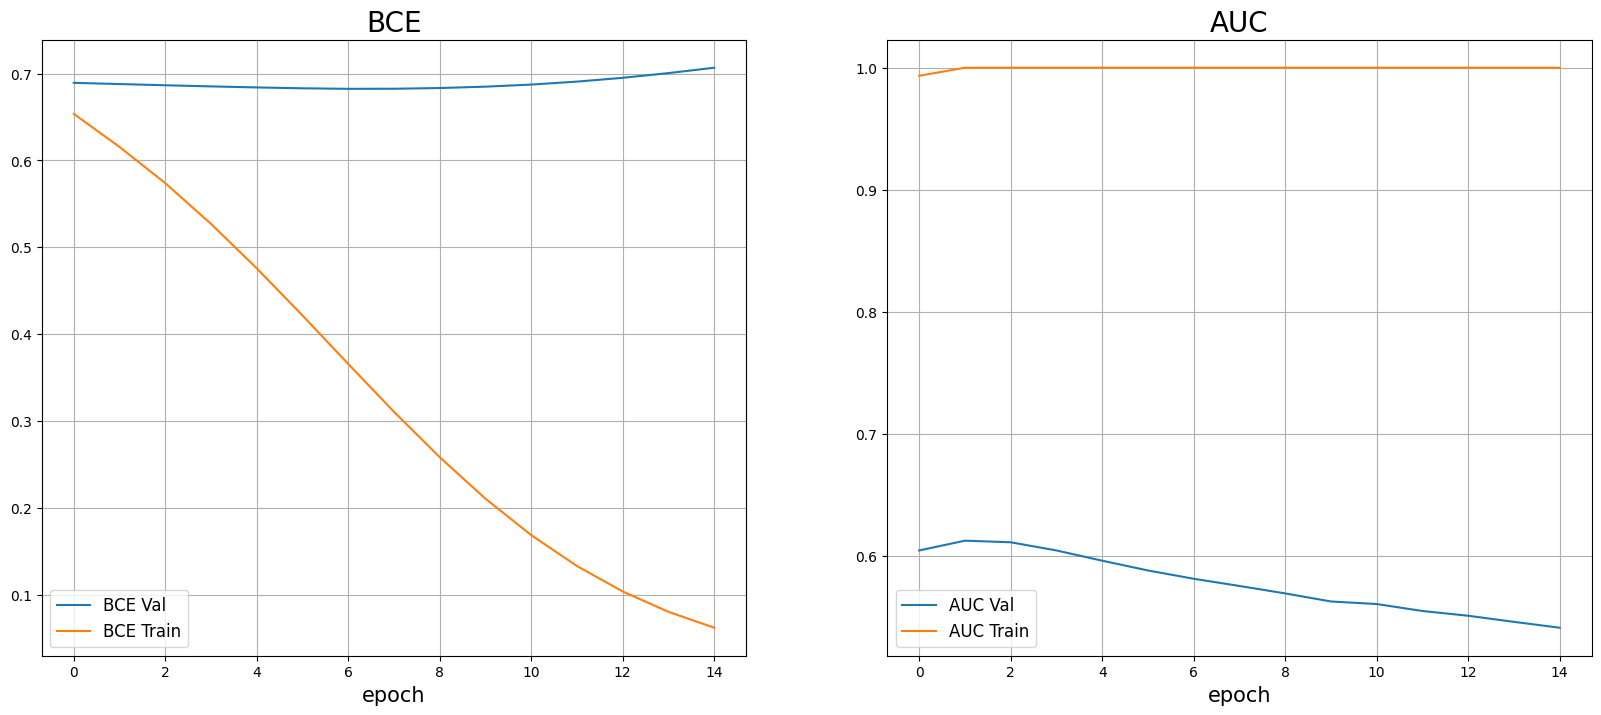

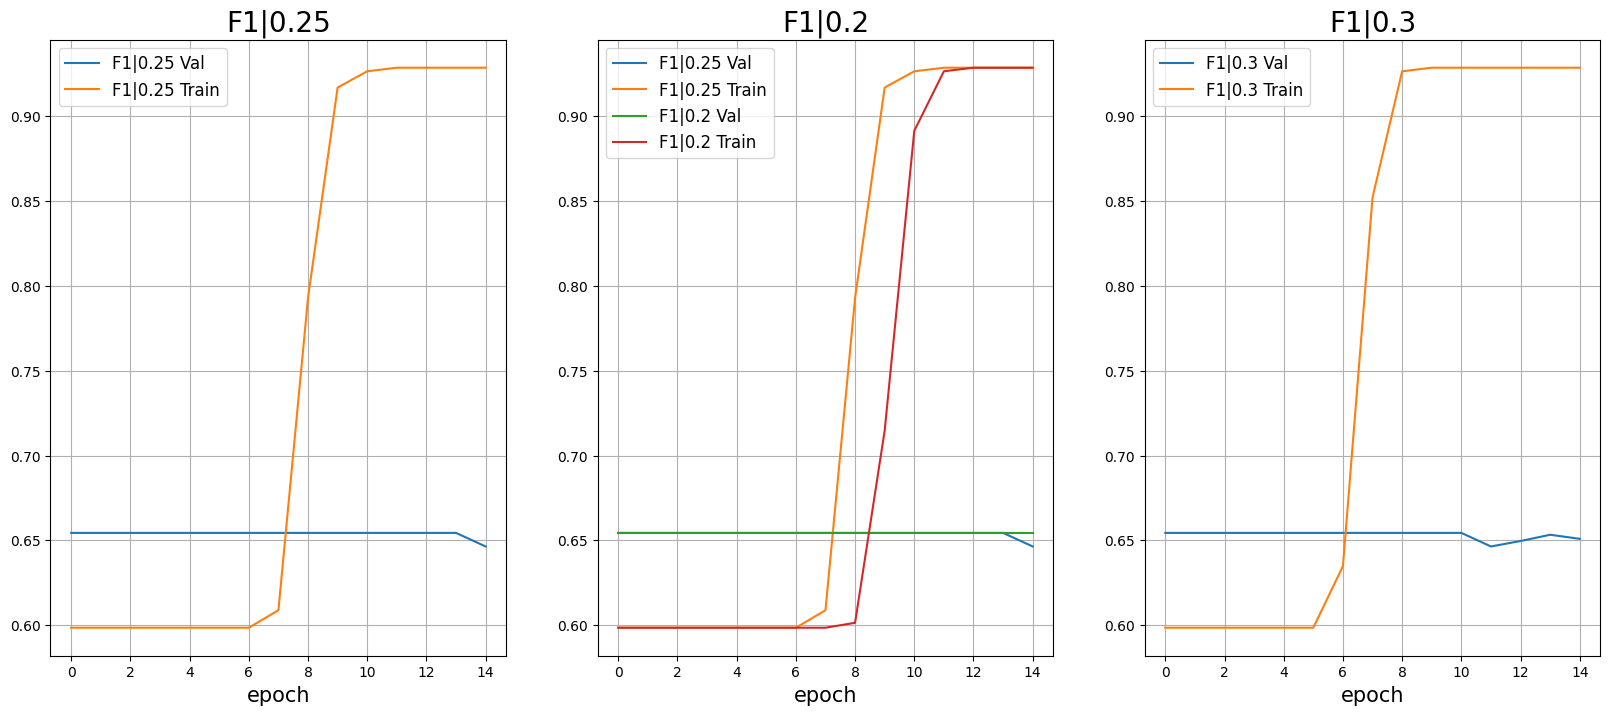

In [ ]:
list_metrics_keywords = ['BCE', 'AUC']

plt.figure(figsize = (20,8) )
for i,kw in enumerate(list_metrics_keywords):
    l = [col for col in df_stat if kw in col]
    plt.subplot(1,len(list_metrics_keywords ),i+1)
    plt.plot( df_stat[l], label = l )
    plt.grid()
    plt.legend(fontsize = 12)
    plt.title(kw, fontsize = 20)
    plt.xlabel('epoch',fontsize = 15)

plt.show()

list_metrics_keywords = ['F1|0.25','F1|0.2', 'F1|0.3' ]

plt.figure(figsize = (20,8) )
for i,kw in enumerate(list_metrics_keywords):
    l = [col for col in df_stat if kw in col]
    plt.subplot(1,len(list_metrics_keywords ),i+1)
    plt.plot( df_stat[l], label = l )
    plt.grid()
    plt.legend(fontsize = 12)
    plt.title(kw, fontsize = 20)
    plt.xlabel('epoch',fontsize = 15)

plt.show()

Clear memory


In [ ]:
%%time
import gc
if 0:
    del X_train,Y_train, X_val, Y_val, train_dataset, train_dataloader, X, Y
gc.collect()
torch.cuda.empty_cache()

CPU times: user 214 ms, sys: 358 µs, total: 215 ms
Wall time: 214 ms


#  Pytorch 2

In [ ]:
mode_loc = 'full' #  'quick_run'
if mode_loc == 'quick_run':
    # Crude downsampling - just for fast run/check - about 2-3 minutes for run
    n_samples_to_consider =  10000#    downsampling - might be useful for debug:  small number - fast run
    n_labels_to_consider = 10 # Up to 31466 but more than 3000-5000 may crash RAM
else:
    n_samples_to_consider =   142246 #  1000 #   50_000#   142246 #    downsampling - might be useful for debug:  small number - fast run
    n_labels_to_consider = 3000 # Up to 31466 but more than 3000-5000 may crash RAM

# Choose emebeddings:
features_id = 't5'#   'esm2S2560' #  'esm2S1280' #  'esm2S320' #

max_epoch = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.005
mode_submit = True

# Loss_function for optimization:
loss_criterion = {'loss':'BCE'}#  {'loss':'Focal'}#   {'loss':'Dice'}#    {'loss':'Tversky'}#
# Choose optimizer:
optimizer_params = {'method': 'SophiaG'} #    {'method': 'Adam'} # {'method': 'RMSprop'} #    {'method': 'SGD'}
# Choose learning rate scheduler
scheduler_params = {'method': 'CosineAnnealingWarmRestarts' }  #  {'method':  'StepLR' } #  {'method':  None } #


cutoff_threshold_low = 0.01 # prediction < cutoff_threshold_low will be set to zero (i.e. no need to save to submission file)

RANDOM_SEED = None # Fix or Not random seed


str_id = 'pMLP_'+features_id+'_Y'+str(n_labels_to_consider) + '_LR'+'%.0e'%(LEARNING_RATE)+'_BS'+str(BATCH_SIZE)
str_id += '_'+str(optimizer_params['method'] )
str_id += '_'+str(str(scheduler_params['method'])[:4] )
str_id += '_'+str(loss_criterion['loss'] )
str_id += '_S'+str(n_samples_to_consider)
str_id += '_CUT'+str(cutoff_threshold_low)
print(str_id, len(str_id))
print(str_id[:48])

pMLP_t5_Y3000_LR5e-03_BS128_SophiaG_Cosi_BCE_S142246_CUT0.01 60
pMLP_t5_Y3000_LR5e-03_BS128_SophiaG_Cosi_BCE_S14


In [ ]:
logs_file_path = 'test.txt'

In [ ]:
import psutil
import datetime

def get_available_ram():
    virtual_memory = psutil.virtual_memory()
    available_ram = virtual_memory.available
    return available_ram
def log_available_ram( str_for_logging_optional = None):
    try:
        virtual_memory = psutil.virtual_memory()
        available_ram_bytes = virtual_memory.available
        # Convert bytes to other units if needed (e.g., megabytes, gigabytes)
        available_ram_megabytes = available_ram_bytes / (1024 ** 2)
        available_ram_gigabytes = available_ram_bytes / (1024 ** 3)

        print(f"Available RAM: {available_ram_bytes} bytes")
        print(f"Available RAM: {available_ram_megabytes:.2f} MB")
        if str_for_logging_optional is not None:
            print(str_for_logging_optional)
        current_datetime = datetime.datetime.now()
        str1 = f"Available RAM: {available_ram_gigabytes:.2f} G  Current datetime: {current_datetime}"
        print( str1 )

        with open(logs_file_path, 'a') as file:
            if str_for_logging_optional is not None:
                file.write(str_for_logging_optional + '\n')
            file.write(str1 + '\n')
        print("Data appended successfully.")
    except Exception as e:
        print(f"Error while appending data: {e}")

#     return available_ram
log_available_ram('On start')

Available RAM: 11535466496 bytes
Available RAM: 11001.08 MB
On start
Available RAM: 10.74 G  Current datetime: 2023-10-15 18:49:50.957669
Data appended successfully.


In [ ]:
%%time
import random
def seed_all(RANDOM_SEED):
    if RANDOM_SEED is not None:
        try:
            SEED = RANDOM_SEED
            random.seed(SEED)
            np.random.seed(SEED)
            torch.manual_seed(SEED)
            torch.cuda.manual_seed_all(SEED)
            torch.backends.cudnn.deterministic = True
            torch.backends.cudnn.benchmark = False

        except Exception as e:
            print(f"Exception: {e}")

seed_all(RANDOM_SEED)

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 37 µs



# Optimizer "Sophia" sometimes better than Adam¶

In [ ]:
%%capture
!git clone https://github.com/kyegomez/Sophia.git
! python Sophia/setup.py install
!rm Sophia/Sophia/__init__.py
from Sophia.Sophia.Sophia import SophiaG

**Focal loss
Focal Loss was introduced by Lin et al of Facebook AI Research in 2017 as a means of combatting extremely imbalanced datasets where positive cases were relatively rare. Their paper "Focal Loss for Dense Object Detection" is retrievable here: https://arxiv.org/abs/1708.02002. In practice, the researchers used an alpha-modified version of the function so I have included it in this implementation.**

In [ ]:
#PyTorch
ALPHA = 0.8
GAMMA = 2

class FocalLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(FocalLoss, self).__init__()

    def forward(self, inputs, targets, alpha=ALPHA, gamma=GAMMA, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)

        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        #first compute binary cross-entropy
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        BCE_EXP = torch.exp(-BCE)
        focal_loss = alpha * (1-BCE_EXP)**gamma * BCE

        return focal_loss

In [ ]:
#PyTorch
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)

        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)

        return 1 - dice

In [ ]:
#PyTorch
ALPHA = 0.5
BETA = 0.5

class TverskyLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(TverskyLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1, alpha=ALPHA, beta=BETA):

        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)

        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        #True Positives, False Positives & False Negatives
        TP = (inputs * targets).sum()
        FP = ((1-targets) * inputs).sum()
        FN = (targets * (1-inputs)).sum()

        Tversky = (TP + smooth) / (TP + alpha*FP + beta*FN + smooth)

        return 1 - Tversky

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
def update_modeling_stat(df_stat,str_id, model, X_train, Y_train, X_val, Y_val, IX_train, IX_val,
                         epoch , ix_fold, t0_epoch_train, dict_optional_info = {}, record_index = None, verbose = 0  ):
    '''
    Compute/store/save scores/metrics/statistics on modelling.
    '''
    if verbose >= 100:
        print('Scoring starts')

    IX_df_stat = record_index
    if IX_df_stat is None:
        IX_df_stat = len(df_stat)+1


    t0 = time.time()
    df_stat.loc[IX_df_stat,'Id'] = str_id
    df_stat.loc[IX_df_stat,'epoch'] = epoch
    df_stat.loc[IX_df_stat,'fold'] = ix_fold

    model.eval()
    with torch.no_grad():
        preds_val = model(X_val)
        if X_train is not None:
            preds_train = model(X_train)

        df_stat.loc[IX_df_stat,'Loss Val'] = criterion(preds_val, Y_val).item()
        if X_train is not None:
            df_stat.loc[IX_df_stat,'Loss Train'] = criterion(preds_train, Y_train).item()

        #from torchmetrics.classification import BinaryF1Score
        f1 = BinaryF1Score(threshold=0.25, multidim_average= 'samplewise'  )
        s = f1(preds_val, Y_val) # vector of values for each sample
        df_stat.loc[IX_df_stat, 'F1|0.25 Val'] = s.mean().item()#  average over samples
        if X_train is not None:
            s = f1(preds_train, Y_train)
            df_stat.loc[IX_df_stat, 'F1|0.25 Train'] =  s.mean().item()


        #from torchmetrics import AUROC
        auroc = AUROC(task = 'binary')
        s = auroc(preds_val, Y_val) # auroc between flattened arguments
        df_stat.loc[IX_df_stat, 'AUC Val'] = s.item()
        if X_train is not None:
            s = auroc(preds_train, Y_train) # auroc between flattened arguments
            df_stat.loc[IX_df_stat, 'AUC Train'] =  s.item()


        for threshold_for_f1 in [0.2,0.3]:
            #from torchmetrics.classification import BinaryF1Score
            f1 = BinaryF1Score(threshold=threshold_for_f1, multidim_average= 'samplewise'  )
            s = f1(preds_val, Y_val) # vector of values for each sample
            df_stat.loc[IX_df_stat, 'F1|'+str(threshold_for_f1)+' Val'] = s.mean().item()#  average over samples
            if X_train is not None:
                s = f1(preds_train, Y_train)
                df_stat.loc[IX_df_stat, 'F1|'+str(threshold_for_f1)+' Train'] =  s.mean().item()


    df_stat.loc[IX_df_stat, 'n_targets'] = Y_val.shape[1]
    df_stat.loc[IX_df_stat, 'n_samples Val'] = Y_val.shape[0]
    df_stat.loc[IX_df_stat, 'Time scoring'] = np.round(time.time() - t0, 1 )
    df_stat.loc[IX_df_stat, 'Time train epoch'] = np.round(t0_epoch_train , 1 )
    df_stat.loc[IX_df_stat, 'Time scoring'] = np.round(time.time() - t0, 1 )
    for k in dict_optional_info:
        val = dict_optional_info[k]
        df_stat.loc[IX_df_stat, k] = val

    df_stat.to_csv('df_foldwise_stat.csv')
    if verbose > 0:
        display(df_stat.tail(1))
        print('Scoring finished. Seconds passed:  %.1f'%(time.time() - t0)  )


    return df_stat

In [ ]:
loss_criterion['loss'] == 'BCE'

True

In [ ]:
%%time
######################### Params ##################################################3

if 0: # Params setting moved to the top of the notebook - section "Key params"
    max_epoch = 10
    BATCH_SIZE = 128
    LEARNING_RATE = 0.001
    mode_submit = True
verbose = 1000

######################### Output ##################################################
df_stat = pd.DataFrame()

########################## Preparations ###########################################

#         ######### import etc  ######
from torchmetrics.classification import BinaryF1Score
from torchmetrics import AUROC
import gc
import time

print();print();

if loss_criterion['loss'] == 'BCE':
    criterion = nn.BCELoss()
elif loss_criterion['loss'] == 'Focal':
    criterion =  FocalLoss()
elif loss_criterion['loss'] == 'Dice':
    criterion =  DiceLoss()
elif loss_criterion['loss'] == 'Tversky':
    criterion =   TverskyLoss()


#         #########  Other stuff to initialize ######

cnt_blend_submit = 0 ;
if (mode_submit is not None) and ( mode_submit != False ): # None
    Y_submit = np.zeros( (141865, Y.shape[1] )  , dtype = np.float16 )

t0 = time.time()
folds = 5
print(); print('Start training NN',datetime.datetime.now()) ; print()
list_folds_ix =  np.sort(list ( set(folds))  )

log_available_ram('Right before modeling')

########################## Main modelling  ###########################################
for ix_fold  in  list_folds_ix:

    model =  MyModel(X.shape[1],Y.shape[1]) # Reinitialize model each time, otherwise weights will be updated

    if optimizer_params['method'] == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    elif optimizer_params['method'] == 'SophiaG':
        optimizer = SophiaG(model.parameters(),lr=LEARNING_RATE, betas=(0.965, 0.99), rho = 0.01, weight_decay=1e-1)
    elif optimizer_params['method'] == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=LEARNING_RATE)
    elif optimizer_params['method'] == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

    if scheduler_params['method'] is None:
        lr_sched = None
    elif scheduler_params['method'] == 'CosineAnnealingWarmRestarts':
        lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.001, last_epoch=-1) # https://www.kaggle.com/code/lidiashishina/pytorch-01-basics?scriptVersionId=138484544&cellId=33
    elif scheduler_params['method'] == 'StepLR':
        lr_sched = torch.optim.lr_scheduler.StepLR(optimizer, 0.5, 5)


    ##################### Prepare train data ###################################################
    mask_fold = folds == ix_fold
    IX_train = np.where(mask_fold ==  0)[0]; IX_val = np.where(mask_fold > 0 )[0];
    X_train = torch.tensor(X[IX_train,:], dtype=torch.float32).to(device)
    Y_train = torch.tensor(Y[IX_train,:], dtype=torch.float32).to(device)
    X_val = torch.tensor(X[IX_val,:], dtype=torch.float32).to(device)
    Y_val = torch.tensor(Y[IX_val,:], dtype=torch.float32).to(device)
    train_dataset = TensorDataset(X_train, Y_train)
    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    if verbose >= 100:
        print(model)
        print('fold',ix_fold, 'count:', mask_fold.sum(), 'n_targets:', Y_train.shape[1], 'Time: %.1f'%( time.time() - t0  )  )
        print('X_train.shape, Y_train.shape', X_train.shape, Y_train.shape); print();

    log_available_ram(f'Right After Model, X_train/val initialization. Training loop fold: {ix_fold}')

    ##################### Model Training ###################################################
    for epoch in range(max_epoch):
        t0_epoch = time.time()
        model.train() # switch model into train mode. This helps inform layers such as Dropout and BatchNorm, which are designed to behave differently during training and evaluation. For instance, in training mode, BatchNorm updates a moving average on each new batch; whereas, for evaluation mode, these updates are frozen.
        for i_batch, (x_batch, y_batch) in enumerate(train_dataloader): # Loop ove batches
#             x_batch, y_batch = x_batch.to(device), y_batch.to(device) # do we need it ? may be already on device
            optimizer.zero_grad() # technical - set gradients to zero, otherwise they will be accumulated

            preds = model(x_batch)# Compute predictions only for batch samples

            loss = criterion(preds, y_batch) # Compute loss function for batch predictions

            loss.backward() # Compute gradients
            optimizer.step() # Update NN weights using gradients

        if lr_sched is not None:
            lr_sched.step() # Step LR scheduler

        if (verbose >= 10 ) and (i_batch % 100 == 0)  :
            print(f'fold: {ix_fold}, Epoch: {epoch}, batch: {i_batch},  train loss on batch: {loss.item():12.5f} , time: {time.time() - t0:.1f} ' )


        ##################### Compute/store scores,metrics,statistics, etc ###################################################
        t0_epoch_train = time.time() - t0_epoch
        update_modeling_stat(df_stat,str_id, model, X_train, Y_train, X_val, Y_val, IX_train, IX_val,
                             epoch , ix_fold, t0_epoch_train, dict_optional_info = {}, record_index = None, verbose = 1000000   )

    ##################### Prepare predict for submission ###################################################
    if  (mode_submit is not None) and ( mode_submit != False ):
        t0_submit = time.time()
        model.eval()
        with torch.no_grad():
            Y_submit = (Y_submit * cnt_blend_submit  + model(x_batch).numpy() )/ (cnt_blend_submit + 1);  # Average predictions from different folds/models
            cnt_blend_submit += 1
        if verbose >= 10: print(f'predict on submit time: {time.time() - t0_submit :.1f} ' )


    del X_train, Y_train, X_val, Y_val,  train_dataset, train_dataloader
    gc.collect()
    torch.cuda.empty_cache()
    if verbose > 0:
        log_available_ram(f'Training loop fold: {ix_fold}')

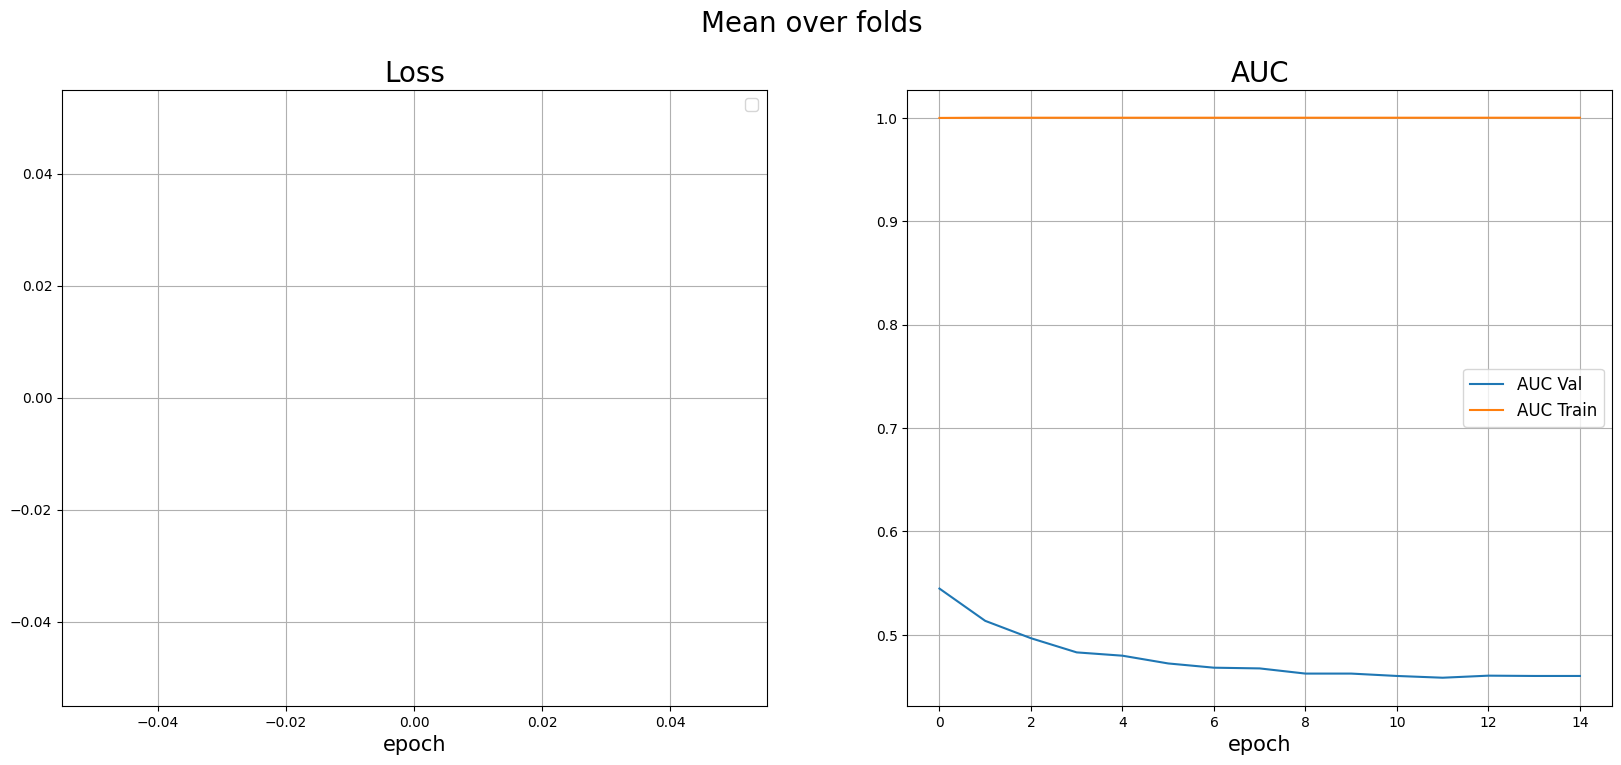

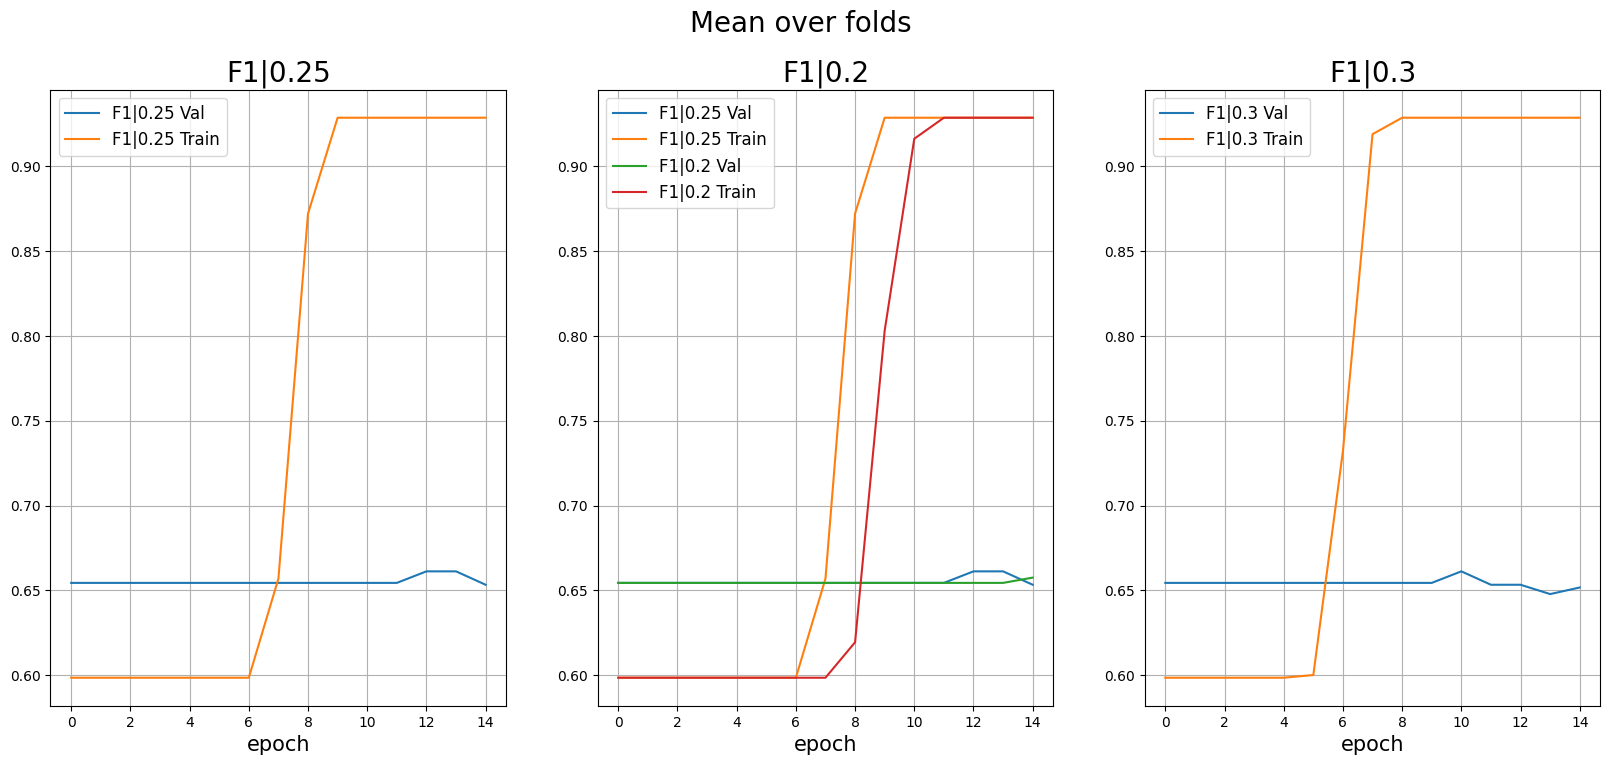

In [ ]:
d2 = df_stat.groupby('epoch').mean()

list_metrics_keywords = ['Loss', 'AUC']

plt.figure(figsize = (20,8) )
plt.suptitle('Mean over folds',fontsize = 20 )
for i,kw in enumerate(list_metrics_keywords):
    l = [col for col in df_stat if kw in col]
    plt.subplot(1,len(list_metrics_keywords ),i+1)
    plt.plot( d2[l], label = l )
    plt.grid()
    plt.legend(fontsize = 12)
    plt.title(kw, fontsize = 20)
    plt.xlabel('epoch',fontsize = 15)

plt.show()

list_metrics_keywords = ['F1|0.25','F1|0.2', 'F1|0.3' ]

plt.figure(figsize = (20,8) )
plt.suptitle('Mean over folds',fontsize = 20 )
for i,kw in enumerate(list_metrics_keywords):
    l = [col for col in df_stat if kw in col]
    plt.subplot(1,len(list_metrics_keywords ),i+1)
    plt.plot( d2[l], label = l )
    plt.grid()
    plt.legend(fontsize = 12)
    plt.title(kw, fontsize = 20)
    plt.xlabel('epoch',fontsize = 15)

plt.show()

In [ ]:
for ix_fold in np.sort( df_stat['fold'].unique()):
    list_metrics_keywords = ['Loss', 'AUC']

    print(ix_fold)
    mask = df_stat['fold'] == ix_fold
    print(mask.sum())
    plt.figure(figsize = (20,8) )
    plt.suptitle('Fold: '+str(ix_fold) , fontsize = 20 )
    for i,kw in enumerate(list_metrics_keywords):
        l = [col for col in df_stat if kw in col]
        plt.subplot(1,len(list_metrics_keywords ),i+1)
        plt.plot( df_stat[l][mask].values, label = l )
        plt.grid()
        plt.legend(fontsize = 12)
        plt.title(kw, fontsize = 20)
        plt.xlabel('epoch',fontsize = 15)

    plt.show()

    list_metrics_keywords = ['F1|0.25','F1|0.2', 'F1|0.3' ]

    plt.figure(figsize = (20,8) )
    plt.suptitle('Fold: '+str(ix_fold) , fontsize = 20 )
    for i,kw in enumerate(list_metrics_keywords):
        l = [col for col in df_stat if kw in col]
        plt.subplot(1,len(list_metrics_keywords ),i+1)
        plt.plot( df_stat[l][mask].values, label = l )
        plt.grid()
        plt.legend(fontsize = 12)
        plt.title(kw, fontsize = 20)
        plt.xlabel('epoch',fontsize = 15)

    plt.show()